# Exploring the data

This notebook takes an early look at the data. The contents of it were used in team discussions and decision making processes on what avenues to pursue further. The contents were not used in the final presentations / reports, but did form part of the data analysis journey.

It looks at:

* Market indicators vs. speech sentiment at a high level,
* The base rate vs. speech sentiment at a high level,
* FSR and MPR vs. speech sentiment at a high level

## Technical notes

This notebook was created using:

* Python 3.11.5 | packaged by Anaconda, Inc.
* Juypter Notebook: 2.1.1
* Numpy version: 1.25.2
* Pandas version: 2.1.1
* Seaborn version: 0.13
* Plotly version: 5.9.0

Last run on 13/04/2024 by Emma Roberts and returned 0 warnings or errors.

## Library and Data import

In [1]:
# Imports
import numpy as np
import pandas as pd
import os
import warnings
import datetime

# Supress warnings
warnings.filterwarnings('ignore')

# Visualisation
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
# Create user defined function for import and checking
def import_and_check(file_path):
    # Import limited to csv and xlsx given provided data
    data = (
        pd.read_csv(file_path) 
        if file_path.endswith('.csv') 
        else pd.read_excel(file_path))

    # Check for missing values
    missing_values = data.isnull().sum()

    # Display shape and data types
    print(data.shape)
    print(' ')
    print(data.dtypes)
    print(' ')
    
    # Display missing values
    print(missing_values)

    # Check for duplicate records
    duplicate_records = data[data.duplicated()]
    
    # Display duplicate records
    if not duplicate_records.empty:
        print('\nDuplicate Records:')
        display(duplicate_records)
    else:
        print('\nNo Duplicate Records Found.')

    # Display head and tail for headers, 
    # footers, and to confirm data loaded successfully
    display(data.head())
    display(data.tail())
    
    return data

In [3]:
# List all files in the working directory
files = ['all_data.csv']

# Create a dictionary to store dataframes
dataframes = {}

# Iterate over each file
for file_name in files:
    # Don't attempt to self-import the J-notebook!
    if not file_name.endswith('.ipynb'):
        # Remove the file extension
        name_without_extension = os.path.splitext(file_name)[0]
        print(f"\nSummary for file: {file_name}")
        # Import and check data, and store in the dictionary with the filename as key
        dataframes[name_without_extension] = import_and_check(file_name)

# Extract dataframes and assign them to individual variables
for df_name, df in dataframes.items():
    globals()[df_name] = df


Summary for file: all_data.csv
(6126, 33)
 
date                 object
reference            object
country              object
title                object
author               object
is_gov                 bool
word_count            int64
body                 object
central_bank         object
year                  int64
language             object
vader_polarity      float64
lm_polarity         float64
finbert_polarity    float64
boe_speech             bool
fed_speech             bool
fsr                    bool
mpr                    bool
ftse_250            float64
base_rate           float64
brent_price         float64
cpi                 float64
euro                float64
ftse_100            float64
gdp_million           int64
gold_price            int64
avg_house_price     float64
1_mo_bond           float64
10_yr_bond          float64
2_yr_bond           float64
unemployment        float64
usd                 float64
wage_growth         float64
dtype: object
 
date           

date     reference         country              title  author  \
0  1999-01-04  r981215a_BOE  United Kingdom  Alice in Euroland  Buiter   
1  1999-01-05  r981215a_BOE  United Kingdom  Alice in Euroland  Buiter   
2  1999-01-06  r981215a_BOE  United Kingdom  Alice in Euroland  Buiter   
3  1999-01-07  r981215a_BOE  United Kingdom  Alice in Euroland  Buiter   
4  1999-01-08  r981215a_BOE  United Kingdom  Alice in Euroland  Buiter   

   is_gov  word_count body     central_bank  year  ...     ftse_100  \
0   False        4574  BOE  Bank of England  1998  ...  5879.399902   
1   False        4574  BOE  Bank of England  1998  ...  5958.200195   
2   False        4574  BOE  Bank of England  1998  ...  6148.799805   
3   False        4574  BOE  Bank of England  1998  ...  6101.200195   
4   False        4574  BOE  Bank of England  1998  ...  6147.200195   

   gdp_million  gold_price  avg_house_price  1_mo_bond  10_yr_bond  2_yr_bond  \
0       255773         289      72903.17681      6.023       4.287      4.899   
1       255773         289      72903.17681      6.022       4.330      4.895   
2       255773         290      72903.17681      6.022       4.319      4.917   
3       255773         293      72903.17681      6.022       4.277      4.941   
4       255773         293      72903.17681      6.019       4.252      4.810   

   unemployment     usd  wage_growth  
0           6.2  1.6585          NaN  
1           6.2  1.6542          NaN  
2           6.2  1.6549          NaN  
3           6.2  1.6520          NaN  
4           6.2  1.6423          NaN  

[5 rows x 33 columns]

date     reference         country  \
6121  2022-10-14  r221012a_BOE  United Kingdom   
6122  2022-10-17  r221015a_BOE  United Kingdom   
6123  2022-10-18  r221015a_BOE  United Kingdom   
6124  2022-10-19  r221019a_BOE  United Kingdom   
6125  2022-10-20  r221020a_BOE  United Kingdom   

                                                  title     author  is_gov  \
6121    Monetary policy: an anchor in challenging times       Pill   False   
6122  Monetary policy and financial stability interv...     Bailey    True   
6123  Monetary policy and financial stability interv...     Bailey    True   
6124  Governance of â€œDecentralisedâ€ Finance: Get...    Wilkins   False   
6125       The inflationary consequences of real shocks  Broadbent   False   

      word_count body     central_bank  year  ...     ftse_100  gdp_million  \
6121        3567  BOE  Bank of England  2022  ...  6858.799805       645805   
6122        1767  BOE  Bank of England  2022  ...  6920.200195       645805   
6123        1767  BOE  Bank of England  2022  ...  6936.700195       645805   
6124        5382  BOE  Bank of England  2022  ...  6925.000000       645805   
6125        6035  BOE  Bank of England  2022  ...  6943.899902       645805   

      gold_price  avg_house_price  1_mo_bond  10_yr_bond  2_yr_bond  \
6121        1649         291193.0      2.208       4.323      3.877   
6122        1664         291193.0      2.106       3.981      3.559   
6123        1656         291193.0      2.329       3.943      3.547   
6124        1634         291193.0      2.292       3.871      3.465   
6125        1637         291193.0      2.252       3.904      3.560   

      unemployment     usd  wage_growth  
6121           3.8  1.1170          6.6  
6122           3.8  1.1353          6.6  
6123           3.8  1.1318          6.6  
6124           3.8  1.1214          6.6  
6125           3.8  1.1233          6.6  

[5 rows x 33 columns]

In [4]:
# Convert combined_eco_data_1999_2022 'date' to datetime
all_data['date'] = pd.to_datetime(all_data['date'])

# Check
all_data.dtypes

date                datetime64[ns]
reference                   object
country                     object
title                       object
author                      object
is_gov                        bool
word_count                   int64
body                        object
central_bank                object
year                         int64
language                    object
vader_polarity             float64
lm_polarity                float64
finbert_polarity           float64
boe_speech                    bool
fed_speech                    bool
fsr                           bool
mpr                           bool
ftse_250                   float64
base_rate                  float64
brent_price                float64
cpi                        float64
euro                       float64
ftse_100                   float64
gdp_million                  int64
gold_price                   int64
avg_house_price            float64
1_mo_bond                  float64
10_yr_bond          

###

Imported sucessfully. Some data has missing values where it wasn't freely available for all time periods. Will leave these uncleaned for now to explore the data in it's entirety!

---



## Subsetting 

Let's split out the data a bit to look at how the markets change with sentiment per the business question.

* Drop year, language, reference, title from all.
* Only keep FinBERT as this was determined by the NLP sub team as the best model, look at patterns with:
  * ftse250, ftse100
  * 1 mo, 2 and 10 year bonds
  * gdp, base rate
  * average house price
  * crude oil price (brent)

In [5]:
# List of columns to drop
columns_to_drop = ['boe_speech', 'fed_speech',
                   'fsr', 'mpr', 'language',
                   'title', 'vader_polarity',
                   'lm_polarity']

# Drop the columns from the DataFrame
small_data = all_data.drop(columns=columns_to_drop)

### Ftse

In [6]:
# Subset
ftse = small_data[['finbert_polarity', 'is_gov', 'year', 'ftse_100', 'ftse_250']]

<Figure size 1500x1500 with 0 Axes>

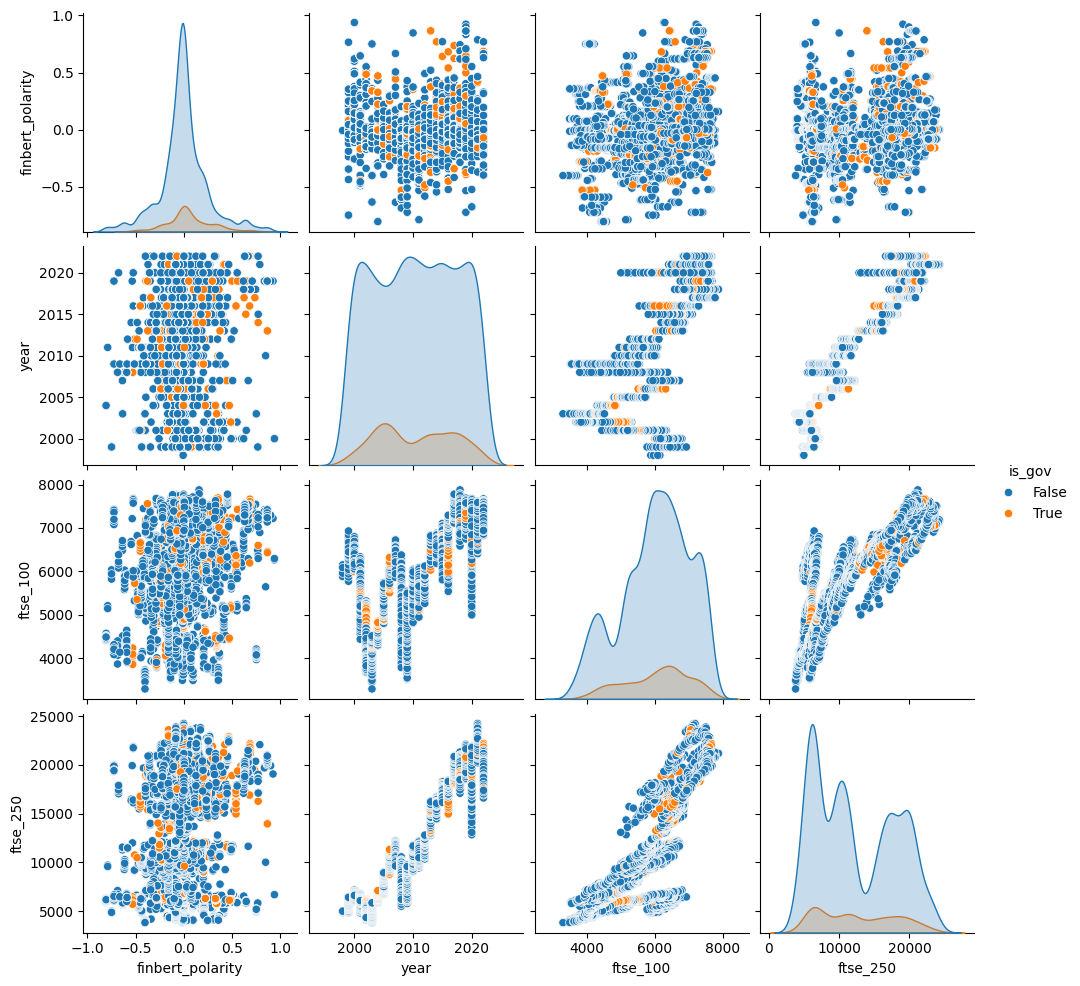

In [7]:
# Set figure size
plt.figure(figsize=(15, 15))

# Create pairplot
pairplot = sns.pairplot(data=ftse,
                        hue='is_gov')

# Save the pairplot with high DPIresolution
pairplot.savefig('ftse_is_gov.png', dpi=300)

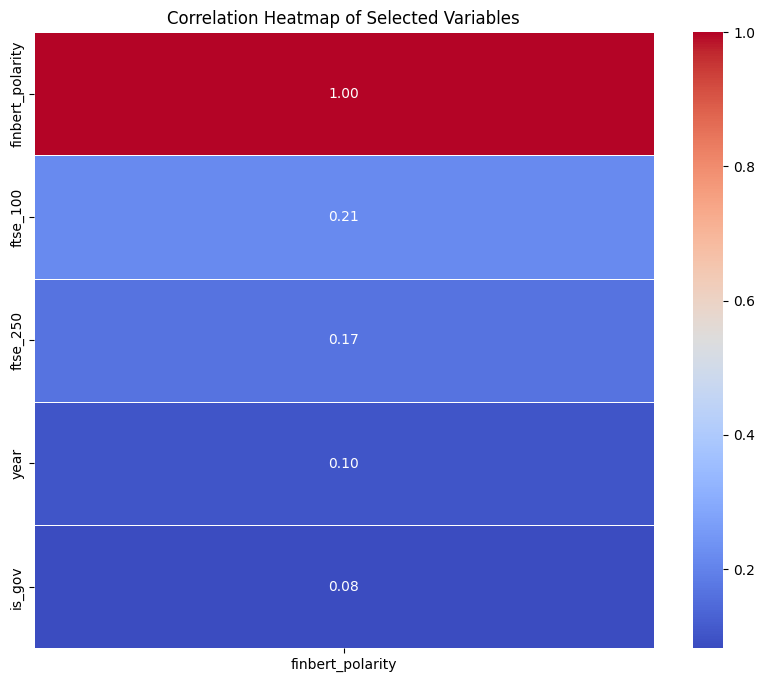

In [8]:
# Calculate the correlation matrix
correlation_matrix = ftse.corr()['finbert_polarity'].sort_values(ascending=False).to_frame()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Selected Variables')
plt.show()

###

There's a slight correlation betweent the speech sentiment and the FTSE100 and FTSE250.


### Bonds

In [9]:
# Subset
bonds = small_data[['finbert_polarity', 'is_gov', 'year', '1_mo_bond', '10_yr_bond', '2_yr_bond']]

<Figure size 1500x1500 with 0 Axes>

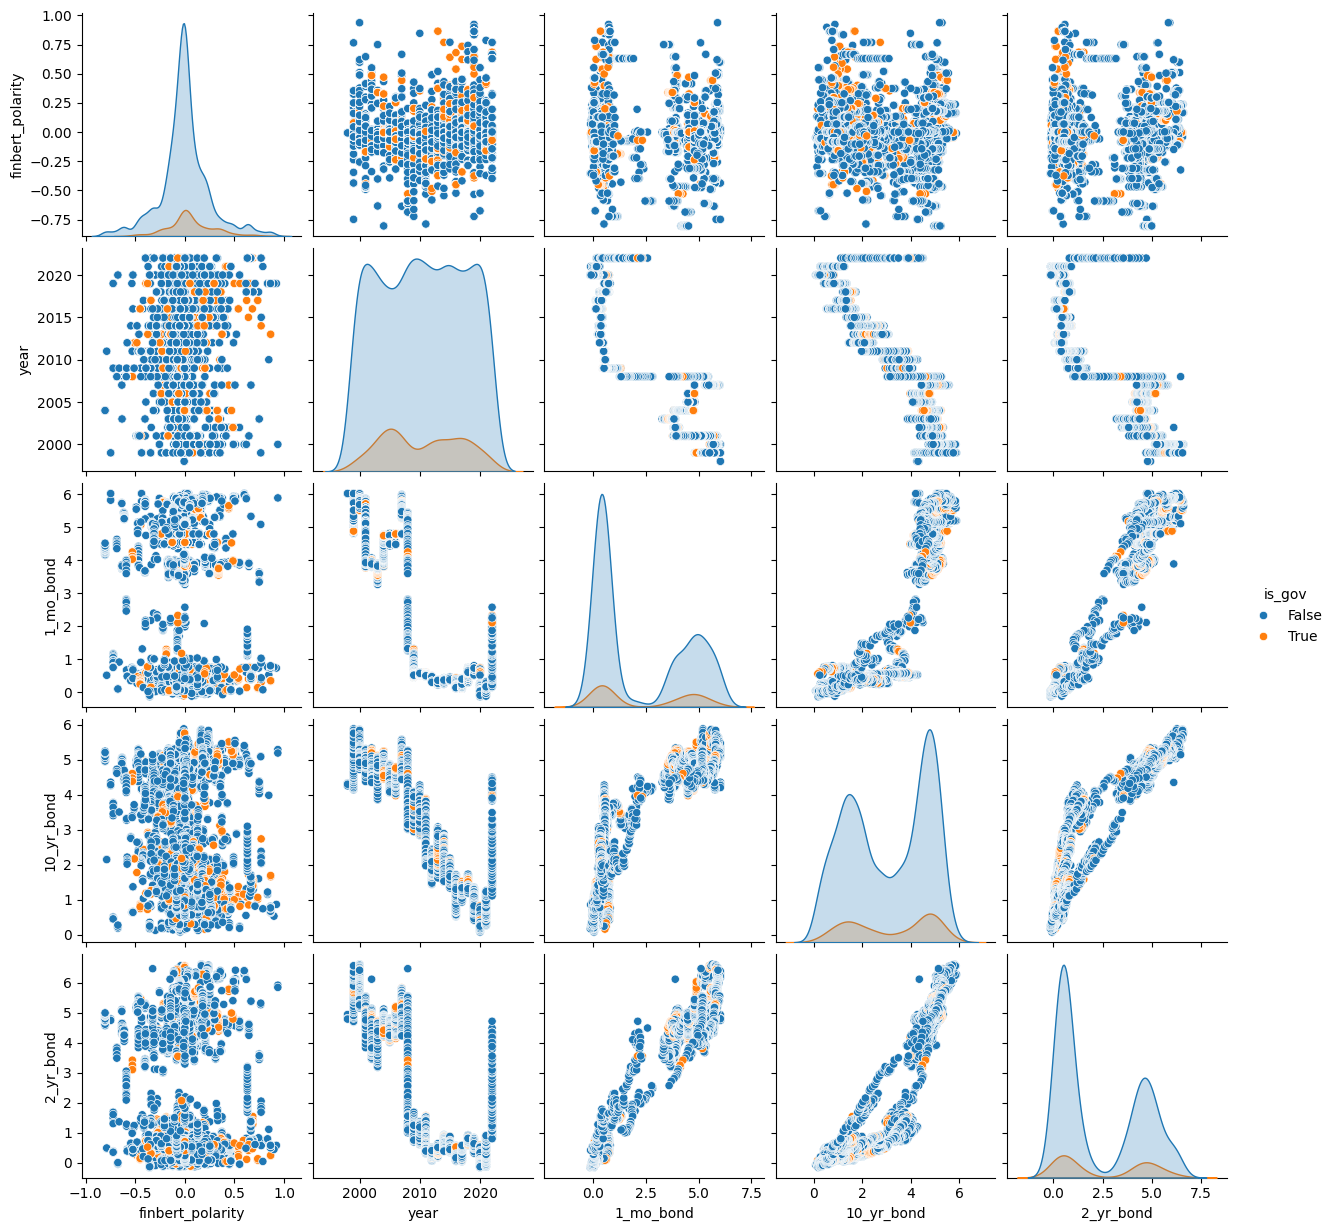

In [10]:
# Set figure size
plt.figure(figsize=(15, 15))

# Create pairplot
pairplot = sns.pairplot(data=bonds,
                        hue='is_gov')

# Save the pairplot with high DPIresolution
pairplot.savefig('bonds_is_gov.png', dpi=300)

###

Some clustering with 1-month and 2-year bonds (and a little bit with 10 year) against finbert sentiment. Also occurs between bonds...

Test if this is due to time period, hypothesis is maybe it's related to the global financial crisis.

<Figure size 1500x1500 with 0 Axes>

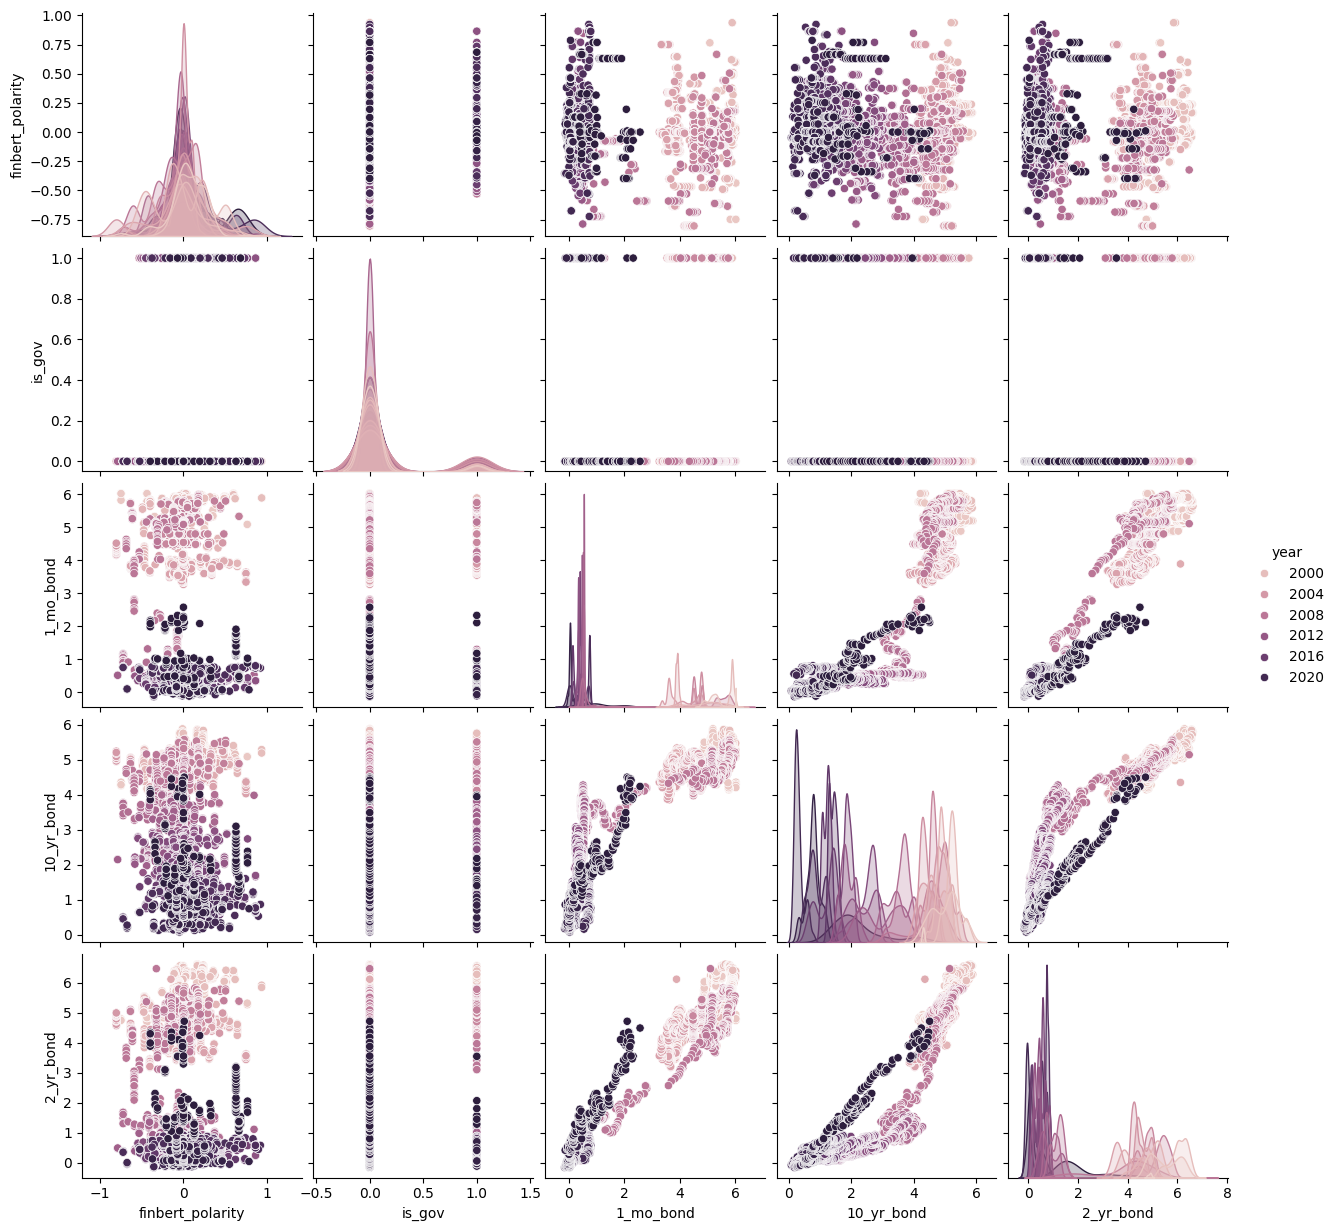

In [11]:
# Set figure size
plt.figure(figsize=(15, 15))

# Create pairplot
pairplot = sns.pairplot(data=bonds,
                        hue='year')

# Save the pairplot with high DPIresolution
pairplot.savefig('bonds_year.png', dpi=300)

###

Looks like bonds behave differently before and after the GFC. The GFC is likely an area we will want to look at more as part of the project.


### GDP

In [12]:
gdp = small_data[['finbert_polarity', 'is_gov', 'year', 'gdp_million', 'base_rate']]

<Figure size 1500x1500 with 0 Axes>

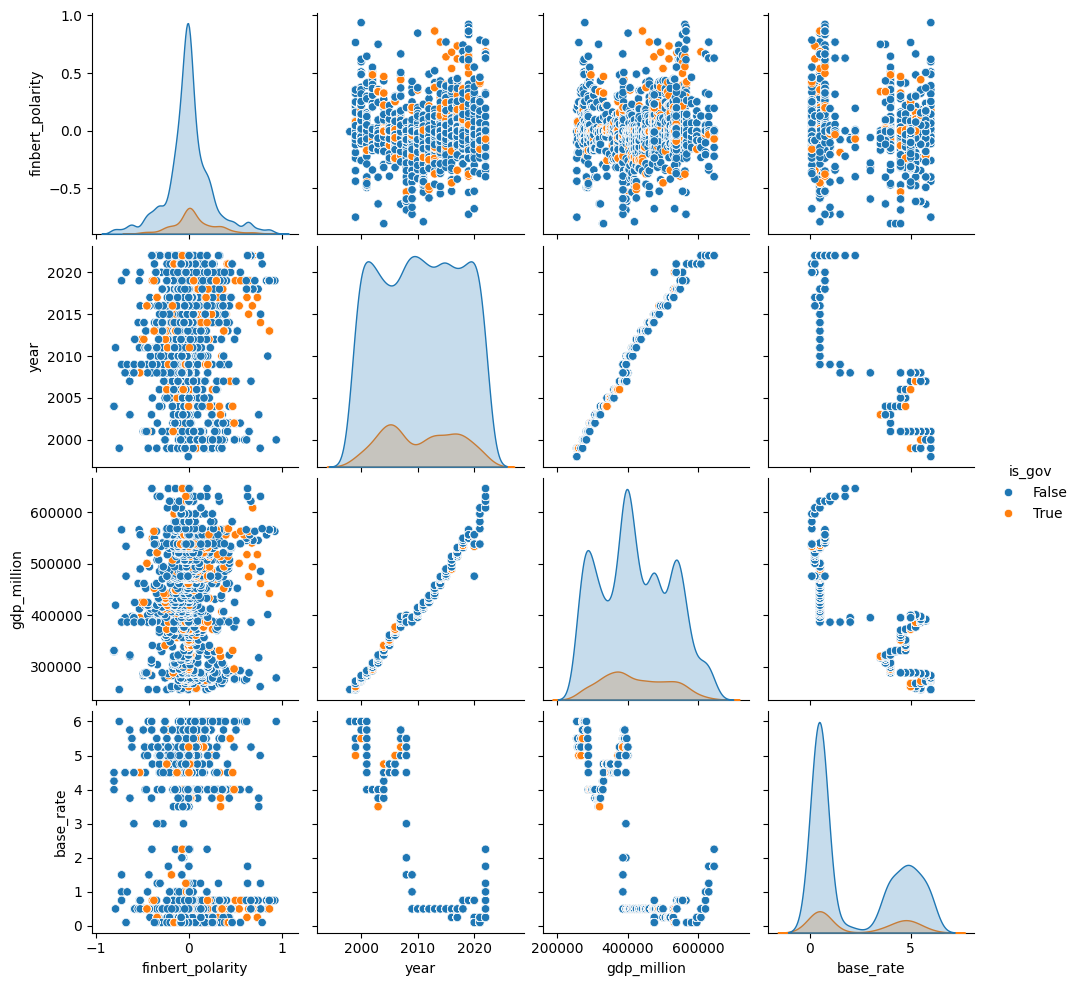

In [13]:
# Set figure size
plt.figure(figsize=(15, 15))

# Create pairplot
pairplot = sns.pairplot(data=gdp,
                        hue='is_gov')

# Save the pairplot with high DPIresolution
pairplot.savefig('gdp_is_gov.png', dpi=300)

###

* There are two distinct periods of base rate, c. 0% and c. 5%.
* There's very little correlation of finbert with GDP
* There's very little correlation of finbert with base rate; at either c. 0% or c. 5%. The range of sentiment is large.


### Houseprices

In [14]:
house = small_data[['finbert_polarity', 'is_gov', 'year', 'avg_house_price']]

<Figure size 1500x1500 with 0 Axes>

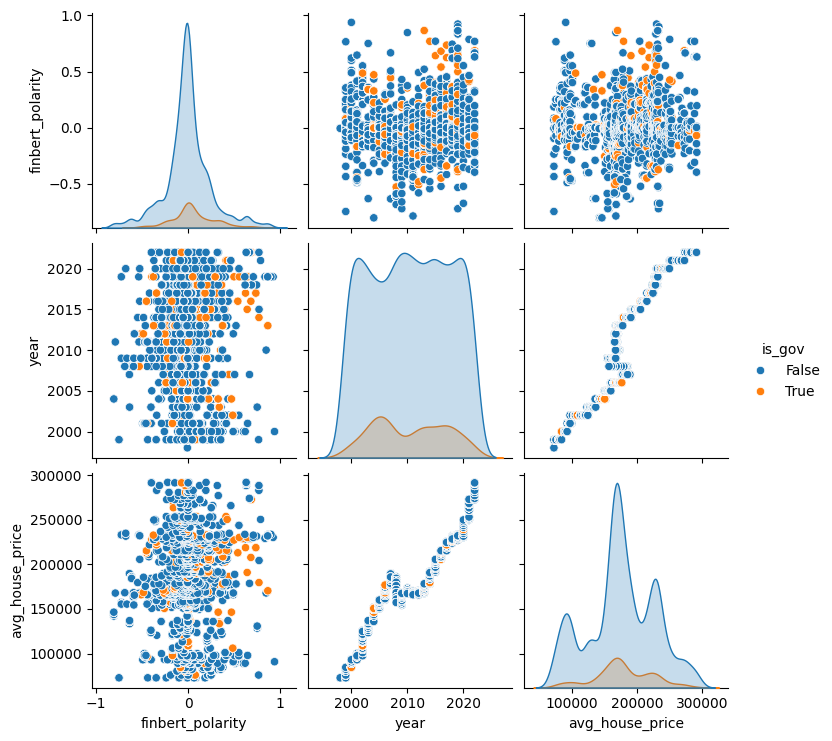

In [15]:
# Set figure size
plt.figure(figsize=(15, 15))

# Create pairplot
pairplot = sns.pairplot(data=house,
                        hue='is_gov')

# Save the pairplot with high DPIresolution
pairplot.savefig('house_is_gov.png', dpi=300)

###

* Very little correlation between sentiment and average house prices.


### Brent crude oil price

In [16]:
brent = small_data[['finbert_polarity', 'is_gov', 'year', 'brent_price']]

<Figure size 1500x1500 with 0 Axes>

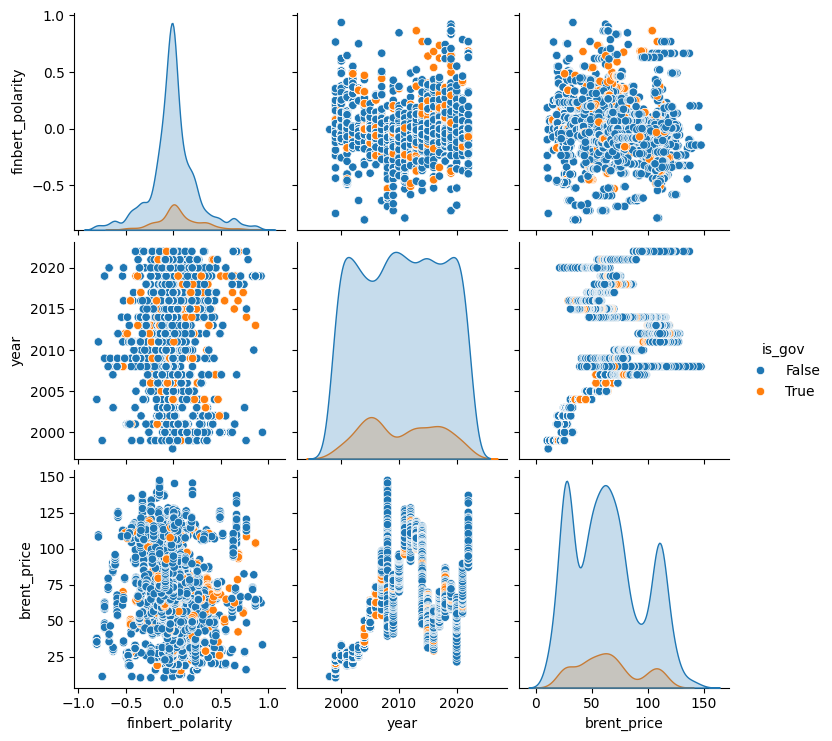

In [17]:
# Set figure size
plt.figure(figsize=(15, 15))

# Create pairplot
pairplot = sns.pairplot(data=brent,
                        hue='is_gov')

# Save the pairplot with high DPIresolution
pairplot.savefig('brent_is_gov.png', dpi=300)

###

* Very little correlation between sentiment and average house prices.

### Summary

* Not a lot of obvious correlations at a high level with speech sentiment and economic indicators,
* Slight correlation with sentiment and the FTSE.
* Clustering is seen for bonds pre- and post- economic crisis.

### Bank Rate, Monetary Policy Report (MPR) and Financial Stability Report (FSR) Over time

Will now look at some metrics overtime.

How does the sentiment of the Bank of England’s speeches correlate with key events such as:
* bank rate decisions (including direction/magnitude of the change)
* publication of the Monetary Policy Report
* publication of the  Financial Stability Report/Review

In [18]:
# Subset
subset = all_data[['date', 'is_gov', 'finbert_polarity', 'boe_speech', 'base_rate', 'cpi', 'mpr', 'fsr']]

###

Make an interactive graph using plotly to enable zooming in on the time periods to look

###

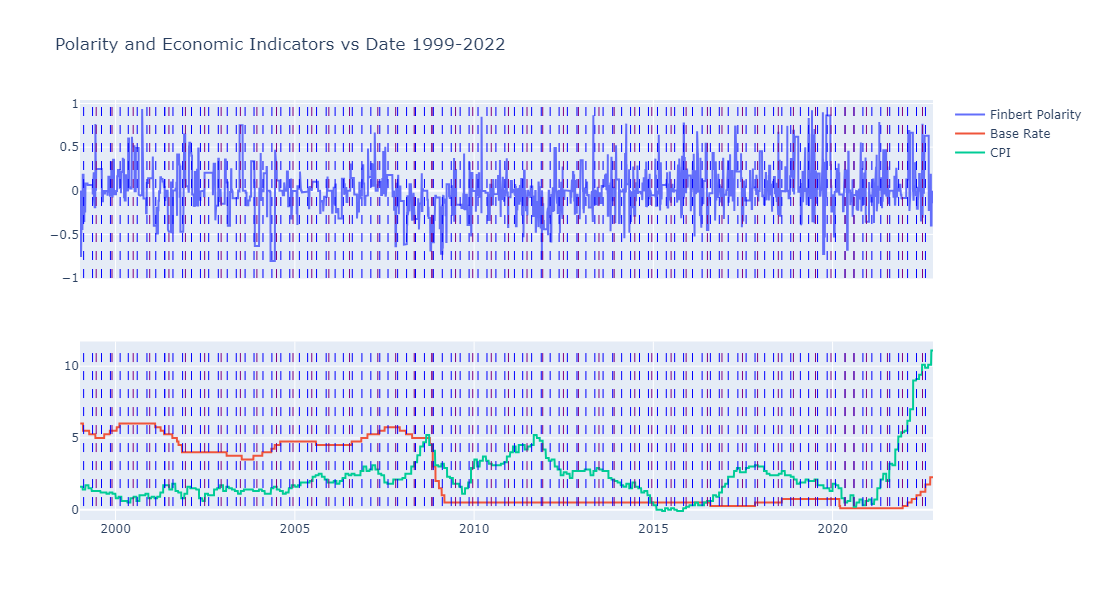

In [19]:
# Create subplots
fig = make_subplots(rows=2, cols=1, shared_xaxes=True)

# Add traces for the first subplot
fig.add_trace(go.Scatter(x=subset['date'], y=subset['finbert_polarity'], mode='lines', name='Finbert Polarity'), row=1, col=1)

# Add vertical lines for mpr and fsr on the first subplot
mpr_dates = subset[subset['mpr'] == 1]['date']
fsr_dates = subset[subset['fsr'] == 1]['date']

for date in mpr_dates:
    fig.add_shape(type="line", x0=date, y0=-1, x1=date, y1=1, line=dict(color="blue", width=1, dash="dash"), row=1, col=1)

for date in fsr_dates:
    fig.add_shape(type="line", x0=date, y0=-1, x1=date, y1=1, line=dict(color="purple", width=1, dash="dash"), row=1, col=1)

# Add traces for the second subplot
fig.add_trace(go.Scatter(x=subset['date'], y=subset['base_rate'], mode='lines', name='Base Rate'), row=2, col=1)
fig.add_trace(go.Scatter(x=subset['date'], y=subset['cpi'], mode='lines', name='CPI'), row=2, col=1)

# Add vertical lines for mpr and fsr on the second subplot
for date in mpr_dates:
    fig.add_shape(type="line", x0=date, y0=None, x1=date, y1=11, line=dict(color="blue", width=1, dash="dash"), row=2, col=1)

for date in fsr_dates:
    fig.add_shape(type="line", x0=date, y0=None, x1=date, y1=11, line=dict(color="purple", width=1, dash="dash"), row=2, col=1)

# Update layout
fig.update_layout(title='Polarity and Economic Indicators vs Date 1999-2022', height=600, width=800)

# Show plot
fig.show()


Playing with the graph above, it was observed that finbert sentiment polarity did change at or around the time of the FSR or MPR being published. This might be interesting to explore further in terms of:

* Is the sentiment in MPR and FSR similar to the speeches? e.g. is the BoE providing and aligned external communication.